
# **_Brian Sena Simons 3ºA - A 2_**

# Práctica 2 - Complejidad de H y Modelos Lineales. 

## **_Alumno: Brian Sena Simons_**
### **_Grupo: 3ºA - A 2_**
Límite de entrega: 8 de Mayo de 2022 a las 23:59 (PRADO)\
Valoración máxima: 12 puntos (+1.5 puntos de Bonus)

Es obligatorio presentar un informe con las valoraciones y decisiones adoptadas en el desarrollo de cada uno de
los apartados. En dicho informe se incluirán los gráficos generados. También deberá incluirse una valoración sobre la
calidad de los resultados encontrados. Sin este informe se considera que el trabajo NO ha sido presentado. El informe debe estar integrado en este mismo cuaderno
(intercalando texto, código y resultados).

# Funciones Auxiliares.

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Fijamos la semilla
seed = 140521
np.random.seed(seed)


def simula_unif(N, dim, rango,complete=False,seed=None):
  if(seed!=None):
    np.random.seed(seed)
  res = []
  if(not complete):
    res =  np.random.uniform(rango[0],rango[1],(N,dim))
  else: 
    res =  np.random.uniform(rango[0],rango[1],(N,dim+1))
    res[:,0] = 1
  
  return res

def simula_gauss(N, dim, sigma,seed=None):
  if(seed!=None):
    np.random.seed(seed)
  media = 0    
  out = np.zeros((N,dim),np.float64)        
  for i in range(N):
      # Para cada columna dim se emplea un sigma determinado. Es decir, para 
      # la primera columna (eje X) se usará una N(0,sqrt(sigma[0])) 
      # y para la segunda (eje Y) N(0,sqrt(sigma[1]))
      out[i,:] = np.random.normal(loc=media, scale=np.sqrt(sigma), size=dim)
    
  return out


def simula_recta(intervalo):
    points = np.random.uniform(intervalo[0], intervalo[1], size=(2, 2))
    x1 = points[0,0]
    x2 = points[1,0]
    y1 = points[0,1]
    y2 = points[1,1]
    # y = a*x + b
    a = (y2-y1)/(x2-x1) # Calculo de la pendiente.
    b = y1 - a*x1       # Calculo del termino independiente.
    
    return a, b


In [92]:
# EJERCICIO 1.2: Dibujar una gráfica con la nube de puntos de salida correspondiente
# La funcion np.sign(0) da 0, lo que nos puede dar problemas
def signo(x):
	if x >= 0:
		return 1
	return -1

def funcion_signo(x, y, a, b):
	return signo(y - a*x - b)


In [93]:
# EJERCICIO 1.3: Supongamos ahora que las siguientes funciones definen la frontera de clasificación de los puntos de la muestra en lugar de una recta  
def plot_datos_cuad(X, y, fz, title='Point cloud plot', xaxis='x axis', yaxis='y axis'):
    #Preparar datos
    min_xy = X.min(axis=0)
    max_xy = X.max(axis=0)
    border_xy = (max_xy-min_xy)*0.01
    
    #Generar grid de predicciones
    xx, yy = np.mgrid[min_xy[0]-border_xy[0]:max_xy[0]+border_xy[0]+0.001:border_xy[0], 
                      min_xy[1]-border_xy[1]:max_xy[1]+border_xy[1]+0.001:border_xy[1]]
    grid = np.c_[xx.ravel(), yy.ravel(), np.ones_like(xx).ravel()]
    pred_y = fz(grid)
    # pred_y[(pred_y>-1) & (pred_y<1)]
    pred_y = np.clip(pred_y, -1, 1).reshape(xx.shape)
    
    #Plot
    f, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, pred_y, 50, cmap='RdBu',vmin=-1, vmax=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label('$f(x, y)$')
    ax_c.set_ticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, linewidth=2, 
                cmap="RdYlBu", edgecolor='white')
    
    XX, YY = np.meshgrid(np.linspace(round(min(min_xy)), round(max(max_xy)),X.shape[0]),np.linspace(round(min(min_xy)), round(max(max_xy)),X.shape[0]))
    positions = np.vstack([XX.ravel(), YY.ravel()])
    ax.contour(XX,YY,fz(positions.T).reshape(X.shape[0],X.shape[0]),[0], colors='black')
    
    ax.set(
       xlim=(min_xy[0]-border_xy[0], max_xy[0]+border_xy[0]), 
       ylim=(min_xy[1]-border_xy[1], max_xy[1]+border_xy[1]),
       xlabel=xaxis, ylabel=yaxis)
    plt.title(title)
    plt.show()
    

# 1. EJERCICIO SOBRE LA COMPLEJIDAD DE H Y EL RUIDO (5 puntos)

## 1.1 (1 punto) Dibujar gráficas con las nubes de puntos simuladas con las siguientes condiciones: 

### 1.1.a) Considere N = 50, dim = 2, rango = [−50, 50] con simula_unif (N, dim, rango).

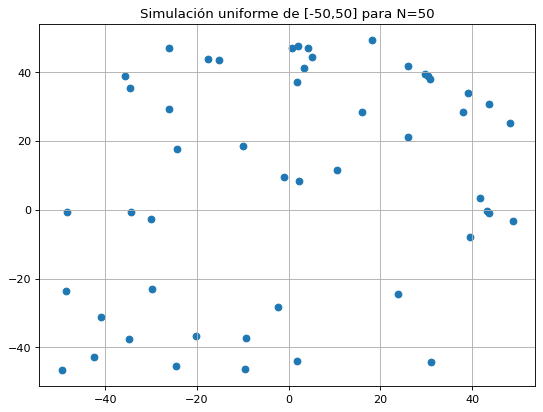

In [94]:
datos_unif = simula_unif(50,2,[-50,50],seed=140421)
plt.figure(dpi=80,figsize=(8,6))
plt.tight_layout()
plt.grid()
plt.title("Simulación uniforme de [-50,50] para N=50")
plt.scatter(datos_unif[:,0], datos_unif[:,1]);
plt.show() 

Con la función auxiliar simula_unif, podemos pasarle directamente los parámetros indicados por el enunciado y vemos que nos devuelve un vector de
puntos perteneciente a esa nube de puntos distribuidos sobre el intervalo indicado. Podemos visualizar-lo con matplotlib.

### 1.1.b) Considere N = 50, dim = 2 y sigma = [5, 7] con simula_gauss(N, dim, sigma).

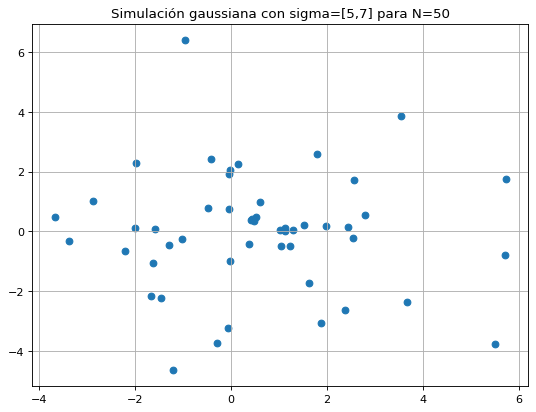

In [95]:
datos_gauss = simula_gauss(50,2,[5,7],seed=140421) 
plt.figure(dpi=80,figsize=(8,6))
plt.tight_layout()
plt.grid()
plt.title("Simulación gaussiana con sigma=[5,7] para N=50")
plt.scatter(datos_gauss[:,0], datos_gauss[:,1]);
plt.show()

A diferencia del simula_unif, simula_gauss nos provee de una nube de puntos con menos dispersión entre los puntos.

## 1.2 Vamos a valorar la influencia del ruido en la selección de la complejidad de la clase de funciones.
Con ayuda de la función simula_unif (100, 2, [−50, 50]) generamos una muestra de puntos 2D
a los que vamos añadir una etiqueta usando el signo de la función $f(x, y) = y − ax − b$, es
decir el signo de la distancia de cada punto a la recta simulada con simula_recta().

Sabemos que simula_recta nos devuelve el valor de la pendiente y del término independiente de la ecuación de la recta $y = ax + b$ para un intervalo dado. Así que podemos definir a, b = simula_recta(intervalo) y luego a continuación haremos una modificación de los datos obtenidos para simula_unif de manera que podamos obtener dos vectores, uno con las etiquetas obtenidas al utilizar la función "signo" que calcula si $valor >= 0 \implies +1 $ y si no pues -1, y otro con las etiquetas y luego  los puntos en un vector de 3 columnas.

In [96]:
datos_unif2 = simula_unif(100,2,[-50,50],seed=140421) 
# la función f12 tiene a y b de simula_recta(Intervalo): 
a, b = simula_recta([-50,50])
unif_labeld = np.zeros(shape=(len(datos_unif2),3))
label_unif2 = np.zeros(shape=(len(datos_unif2),1))
for num, datos in enumerate(datos_unif2):
  label_unif2[num] = funcion_signo(datos[0],datos[1],a,b)
  results = np.array([label_unif2[num],datos[0],datos[1]],dtype=object)
  unif_labeld[num] = results

### 1.2.a) (1 punto) Dibujar un gráfico 2D donde los puntos muestren (use colores) el resultado de su etiqueta. Dibuje también la recta usada para etiquetar. Observe que todos los puntos están bien clasificados respecto de la recta.

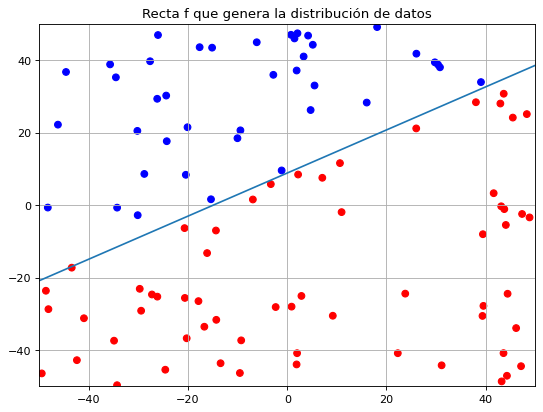

In [97]:
def draw_function(datos,interval, function, ax=None,plots=0,size=(8,6),ylim=None,xlim=None,title=""):
  fig = plt.figure(dpi=80,figsize=size)
  if(plots<=1): plots = 1
  ax = fig.add_subplot(1,plots,1) 
  plt.grid()
  colormap = np.array(['r','g','b'])
  ax.scatter(datos[:,1],datos[:,2], c=colormap[datos[:,0].astype(int)+1])
  valores = np.linspace(interval[0],interval[1],datos.shape[0])
  ax.plot(valores,function(valores))
  plt.xlim(interval[0],interval[1])
  if(ylim!=None):
    plt.ylim(ylim)
  if(title==""):
    plt.title("Recta f que genera la distribución de datos")
  else:
    plt.title(title)
  return fig, ax

f12 = lambda x: a*x + b 
draw_function(unif_labeld,[-50,50],f12,ylim=(-50,50))
plt.show()

Al haber generado las etiquetas a partir de una recta, función f(x), conocida podemos forzar a que el conjunto de datos sea linealmente separable como bien podemos ver en la imagen, ya que tendremos un conjunto etiqueta para los valores que se encuentren por debajo de la recta y para los valores que se encuentren por encima.

### 1.2.b) (0.5 puntos) Modifique de forma aleatoria un 10% de las etiquetas positivas y otro 10% de las negativas y guarde los puntos con sus nuevas etiquetas. Dibuje de nuevo la gráfica anterior. Ahora habrá puntos mal clasificados respecto de la recta.

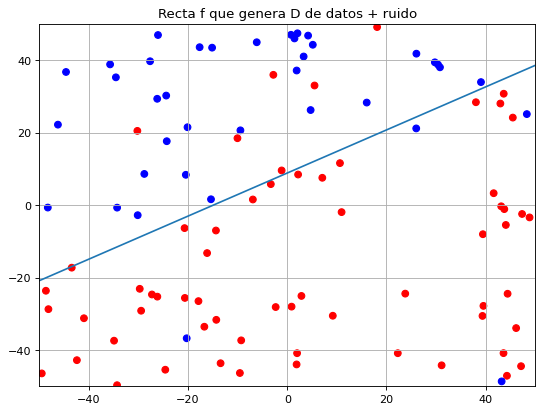

In [98]:
def noise_for(datos, noise):
  arr = datos.copy()
  idx = np.random.choice(range(arr.shape[0]),size=(int(arr.shape[0]*noise)),replace=True)
  arr[idx,0] *= -1
  return arr
  

labeld_unifnox = noise_for(unif_labeld,0.1)
draw_function(labeld_unifnox,[-50,50],f12,ylim=(-50,50),title="Recta f que genera D de datos + ruido")
plt.show()

Si tenemos una muestra de 100 datos, y a esto le añadimos 10% de error vemos que no podremos escapar del hecho de que hayan puntos mal ubicados conllevando a un total de 10 puntos malclasificados. (Eso incluso cuando hablamos de la función generadora). 

#### Definimos la función de verificación clasificación

In [99]:
def missclassify(original,ruido,fsigno):
  res = 0
  for cont, datos in enumerate(original):
    if signo(fsigno(datos[1],datos[2])) != ruido[cont,0]:
      res+=1
  
  return res

fsigno = lambda x,y: y - a*x - b 

print("#########################################")
print("Número de puntos mal-clasificados:",missclassify(unif_labeld,labeld_unifnox,fsigno))
print("#########################################")

#########################################
Número de puntos mal-clasificados: 10
#########################################


Vemos que al añadir un total de 10% de ruido a nuestros datos originales, ahora incluso nuestra función f(x) que es la generadora de estos puntos tiene un total de misclasificación equivalente al ruido. Esto sería lo equivalente a problemas de transporte de datos por interferencia, o errores de etiquetado por factores humanos y entre otros.

### 1.2.c)(2.5 puntos) Supongamos ahora que las siguientes funciones definen la frontera de clasificación de los puntos de la muestra en lugar de una recta:
- $ f(x,y) = (x-10)^2 + (y-20)^2 - 400 $ 
- $f(x,y) = 0.5(x-10)^2 + (y-20)^2 - 400 $  
- $f(x,y) = 0.5(x-10)^2 - (y-20)^2 - 400 $ 
- $f(x,y) = y-20x^2 - 5x + 3 $

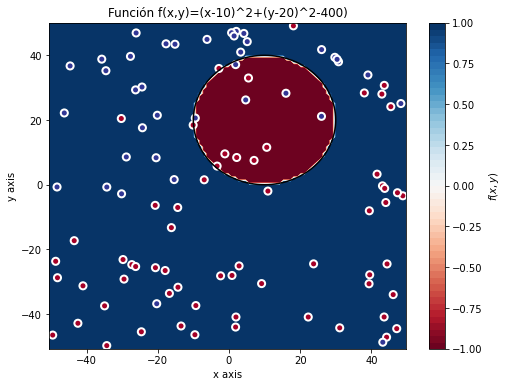

In [100]:
# Definimos las funciones con lambda:
f12c1 = lambda arr: (arr[:,0]-10)**2 + (arr[:,1]-20)**2 - 400 
f12c2 = lambda arr: 0.5*(arr[:,0]-10)**2 + (arr[:,1]-20)**2 - 400 
f12c3 = lambda arr: 0.5*(arr[:,0]-10)**2 - (arr[:,1]-20)**2 - 400 
f12c4 = lambda arr: arr[:,1] - 20 * arr[:,0]**2 - 5*arr[:,0] + 3 

#Ploteamos los datos: 
plot_datos_cuad(datos_unif2,labeld_unifnox[:,0], f12c1,title="Función f(x,y)=(x-10)^2+(y-20)^2-400)")

Vemos que incluso con una función de dimensión Vapnik-Chervonenkis mayor que nuestra función generadora f(x), no hemos logrado separar correctamente a todos los puntos del conjunto con ruido. Incluso visualmente aparenta tener un margen de error mucho mayor. Verifiquemos: 

In [101]:
print("#########################################")
fsign12c1 = lambda x,y : f12c1((np.array([x,y])).reshape(1,2))
print("Número de puntos mal-clasificados:",missclassify(unif_labeld,labeld_unifnox,fsign12c1))
print("#########################################")

#########################################
Número de puntos mal-clasificados: 61
#########################################


Más de la mitad de los puntos han sido mal-clasificados, el area destinado para los valores negativos de nuestra función cuadrática es inapropiado para el conteo real de las etiquetas negativas de la función objetivo. Veremos el comportamiento de las demás:

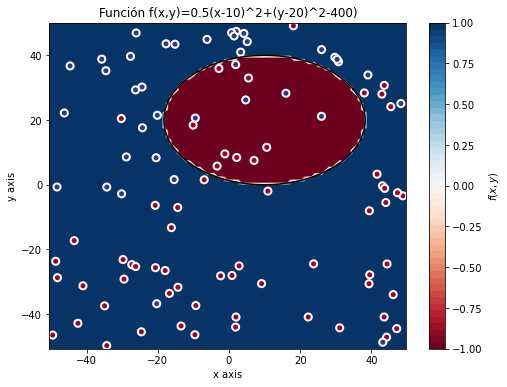

In [102]:
plot_datos_cuad(datos_unif2,labeld_unifnox[:,0], f12c2,title="Función f(x,y)=0.5(x-10)^2+(y-20)^2-400)")

In [103]:
print("#########################################")
fsign12c2 = lambda x,y : f12c2((np.array([x,y])).reshape(1,2))
print("Número de puntos mal-clasificados:",missclassify(unif_labeld,labeld_unifnox,fsign12c2))
print("#########################################")

#########################################
Número de puntos mal-clasificados: 59
#########################################


Incluso peor, debido a que aunque hayamos incrementado el area destinado para los valores negativos, la zona reservada para estos valores está muy alejada de la zona real de los valores negativos generados.

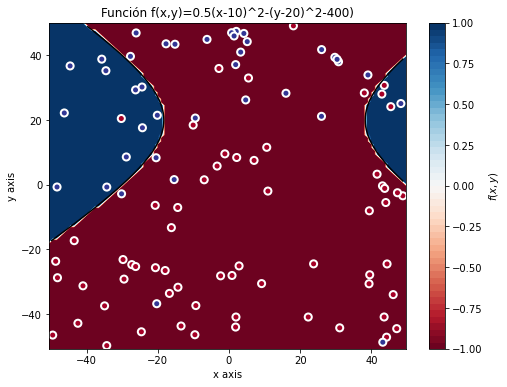

In [104]:
plot_datos_cuad(datos_unif2,labeld_unifnox[:,0], f12c3,title="Función f(x,y)=0.5(x-10)^2-(y-20)^2-400)")

In [105]:
print("#########################################")
fsign12c3 = lambda x,y : f12c3((np.array([x,y])).reshape(1,2))
print("Número de puntos mal-clasificados:",missclassify(unif_labeld,labeld_unifnox,fsign12c3))
print("#########################################")

#########################################
Número de puntos mal-clasificados: 30
#########################################


Para este caso hemos podido mejorar la clasificación al ocupar enteramente la zona negativa correcta de la función objetivo. Sin embargo, en el proceso hemos también asignado erronéamente la zona positiva a valores negativos, por lo que hemos incrementado el acierto en los negativos disminuyendo en los positivos. 

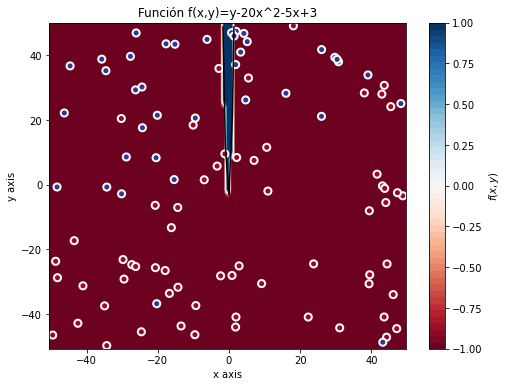

In [106]:
plot_datos_cuad(datos_unif2,labeld_unifnox[:,0], f12c4,title="Función f(x,y)=y-20x^2-5x+3")

In [107]:
print("#########################################")
fsign12c4 = lambda x,y : f12c4((np.array([x,y])).reshape(1,2))
print("Número de puntos mal-clasificados:",missclassify(unif_labeld,labeld_unifnox,fsign12c4))
print("#########################################")

#########################################
Número de puntos mal-clasificados: 37
#########################################


En este función más de lo mismo, al dedicar todo, o casi todo el area, a los puntos negativos, nuestro error va a ser proporcional a la cantidad de etiquetas positivas mal clasificadas, es decir, dependerá de la distribución de los datos de partida.

#### 1.2.c) Explicar resultados 
**Visualizar el etiquetado generado en el apartado 2b junto con la gráfica de cada unade las funciones. Comparar las regiones positivas y negativas de estas nuevas funciones con las obtenidas en el caso de la recta. Argumente si estas funciones más complejas son mejores clasificadores que la función lineal. Observe las gráficas y diga qué consecuencias extrae sobre la influencia de la modificación de etiquetas en el proceso de aprendizaje.**

Como mencionado anteriormente, el ruido puesto a fuerza en nuestras etiquetas, equivale a cualquier posibilidad humana de mal etiquetado, o cualquier interferencia en el procesado de los datos y entre otros. Este tipo de problema en el mundo del aprendizaje no podemos arreglar facilmente.

Vemos que incluso con la función que genera la distribución de los datos, que es la que tiene el error nulo, para una muestra con ruido no consigue clasificar bien los datos.

Incluso con funciones complejas no podemos huir de la tormenta. Las funciones complejas no nos aseguran por completo que obtendremos un error dentro de la muestra igual a cero. Hemos visto que incluso algunas han empeorado la clasificación.

Y si nos aventuramos y entrenamos sobre los datos con las funciones complejas, hemos visto en teoría y empiricamente en la práctica anterior que lo más probable es que aprendamos del error, como memorizar los datos, y luego no lleguemos a generalizar fuera de la muestra sino que incluso podríamos obtener resultados muchos peores. 

La modificación de etiquetas de manera indebida es un gran factor en el resultado de generalización de nuestra hipótesis ya que sabemos que nuestro error fuera de la muestra será proporcional a nuestro error dentro de la muestra más un "$\epsilon$" o error. Y si nuestro error dentro de la muestra es elevado no tendremos confianza sobre nuestro error fuera de la muestra.

Además, si realizamos el mismo esquema para las clases de funciones complejas, desarrollando datos etiquetados según estas, al añadir ruido veremos que también sufrirán las mismas consecuencias que la función lineal sencilla.

# 2. MODELOS LINEALES (7 puntos)

## 2.1. (3 puntos) Algoritmo Perceptrón (PLA).
Implementar la función ajusta_PLA(datos, label, max_iter, vini) que calcula el hiperplano solución a un problema de clasificación binaria usando el algoritmo PLA. 
La entrada datos es una matriz donde cada item con su etiqueta está representado por una fila de la matriz, label el vector de etiquetas (cada etiqueta es un valor +1 o -1), max iter es el número máximo de
iteraciones permitidas y vini el valor inicial del vector. 
La función devuelve los coeficientes del hiperplano

### Definición Teorica PLA

El perceptron en aprendizaje automático es un algoritmo de aprendizaje supervisado de clasificación binaria. El clasificador nos indica a traves de una función si unos datos de entrada pertenecen o no a una clase.  En un sentido moderno el perceptron es un algoritmo denominado de "funcion de umbral" que mapea los valores reales "x" en valores binarios como sigue:
$f(x) = \begin{cases} 1 & if \; w\cdot x + b > 0, \\ 0 & otherwise \end{cases} $

Dónde $w$ es un vector de número reales, $w\cdot x$ es el produto escalar.

El factor b, es el que denomina el umbral, es lo que desplaza la frontera de decisión del origen y no depende de los datos de entrada. Se utiliza la clasificación -1 y +1 para distinguir entre clases.

El algoritmo del perceptron no termina si el conjunto de datos de entrenamiento no es linealmente separable. Por lo que en la práctica se suele imponer un límite de iteraciones si desconocemos, como suele ser, los datos. 

El proceso de aprendizaje ocurre cuando nos equivocamos, en ese caso lo que haremos es "mover" la recta que delimita las clases tal que acierte para el punto equivocado. $ w = w + yx \; if \; h(x)!=f(x) $ 

### Implementación PLA

In [108]:
def predError(x,y,w):
  if(w.shape != (3,1)):
    w = w[:,np.newaxis]
    
  if(w.all()==0):
    return np.count_nonzero(y==-1)
  else: 
    arr = np.sign(x@w) + y
    return np.count_nonzero(arr==0)

In [109]:
def ajusta_PLA(datos, label, w_ini, max_iters=100000,no_max=False,Pocket=False):
    w = w_new = w_ini.copy()
    changed = no_changes = False
    data = it = 0
    while(not no_changes and (it<max_iters or no_max)):
      if signo((w_ini@datos[data])[0]) != label[data]:
        changed = True
        w_new = w_ini + label[data]*datos[data]
        if(not Pocket):
          w = np.vstack((w,w_new)) 
        else: 
          if(predError(datos,label,w_new[-1])<predError(datos,label,w[-1])):
            w = np.vstack((w,w_new))
            
        w_ini = w_new.copy()

      it += 1
      data += 1
      if(data>=datos.shape[0]):
        if(not changed):
          no_changes = True
        changed = False
        data = 0 
    return w,it  

### 2.1.a) Ejecutar el algoritmo PLA con los datos empleados en el apartado 2a del ejercicio 1.
Inicializar el algoritmo con: i) el vector cero y, ii) con vectores de números aleatorios en \[0,1\] (10 veces). Anotar el número medio de iteraciones necesarias en ambos para converger.
Se deben mostrar en una tabla cada uno de los pesos iniciales empleados, los finales (obtenidos tras el proceso de entrenamiento), y el porcentaje de error de clasificación.
Valorar el resultado relacionando el punto de inicio con el número de iteraciones

#### i) Con pesos igual a 0

In [110]:
def get_dataFrom(datos):
  res = np.zeros((datos.shape[0],3))
  for num, data in enumerate(datos):
    res[num,0] = 1
    res[num,1] = data[0]
    res[num,2] = data[1]
  return res
  
w_ini = np.zeros((1,3)) 
pla_data = get_dataFrom(datos_unif2)

w_unif,it = ajusta_PLA(pla_data, label_unif2, w_ini, no_max=True)
print("#### Pesos Obtenidos + Iteraciones####") 
print(w_unif[-1], it)
print("###############################")

#### Pesos Obtenidos + Iteraciones####
[-435.          -29.69052921   51.74154225] 5600
###############################


Con apenas estos datos no podemos inferir como ha actuado nuestro algoritmo, así que definiré una función para visualizarlo mejor:

##### Dibujamos PLA

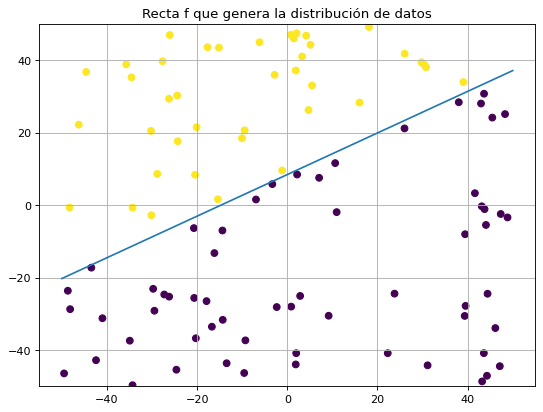

In [111]:
def draw_PLA(datos, label, interval, weights, ax=None,plots=0,size=(8,6)):
  fig = plt.figure(dpi=80,figsize=size)
  if(plots<=1): plots = 1
  ax = fig.add_subplot(1,plots,1) 
  plt.grid()
  ax.scatter(datos[:,1],datos[:,2], c=label[:])
  valores = np.linspace(interval[0],interval[1],datos.shape[0])
  function = lambda x: ( weights[0] + x*weights[1] ) / -weights[2]
  ax.plot(valores,function(valores))
  plt.ylim((interval[0],interval[1]))
  plt.title("Recta f que genera la distribución de datos")
  return ax

draw_PLA(pla_data,label_unif2,[-50,50],w_unif[-1])
plt.show()

Con esta función podemos ver claramente el resultado de nuestro algoritmo. En este caso hemos obtenido la única solución, que la que separa linealmente la muestra como se verifica en la imagen. Esto podría no haber pasado si hubieramos impuesto algún límite de iteración que fuera menor que el necesario por ello he obviado poner un límite, pero con tan solo 5600 iteraciones hemos logrado separar la muestra. 

#### ii) Con pesos aleatorios 10 veces

In [112]:
total = 11
np.random.seed(seed)
store_data = np.zeros(shape=(total,2,3))
store_iter = np.zeros(shape=(total,1))
store_data[0,0] = w_unif[0]
store_data[0,1] = w_unif[-1]
store_iter[0] = it
for i in range(1,total):
  w_ini = np.random.uniform(low=0,high=1,size=(1,3))
  w_,it_ = ajusta_PLA(pla_data, label_unif2, w_ini, no_max=True)
  store_data[i,0] = w_ini
  store_data[i,1] = w_[-1]
  store_iter[i] = it_

avg_it = np.sum(store_iter[:])/total
print("##### Pesos obtenidos + número de iteraciones #### ")
print(store_data[-1,1], avg_it)
print("################################################")

##### Pesos obtenidos + número de iteraciones #### 
[-336.15766278  -23.70384022   41.25818621] 7900.0
################################################


Vemos que extañamente parece incluso que hemos obtenidos valores diferentes, pero podemos verificar fácilmente que al imponer que no haya una máximo número de iteraciones la única manera de que haya convergido es que hayamos separado correctamente todos los datos. Como bien se puede ver a continuación hemos obtenido un error nulo; Además verifiquemos la tabla:

In [113]:
print("#######################################################")
avg_error = 0
for w in store_data[:,-1]:
  avg_error += predError(pla_data,label_unif2,w)
avg_error /= len(store_data)
print("Error medio obtenido por todos los vectores aleatorios: ",avg_error)
print("#######################################################")

#######################################################
Error medio obtenido por todos los vectores aleatorios:  0.0
#######################################################


Con simplemente visualizar que la media de error es nula, podemos inferir que todos los resultados independiente del punto de partida, aunque a priori aparente haber tenido resultados diferentes, han sido soluciones simétricas que separan linealmente la muestra como es de esperar. 

#### Tabla de resultados:

In [114]:
from tabulate import tabulate 
converted = [['Pesos Iniciales','Pesos Finales','Iteraciones']]
for cont, data in enumerate(store_data):
  converted.append([data[0],data[1],store_iter[cont]])

print(tabulate(converted))

----------------------------------  -------------------------------------------  -----------
Pesos Iniciales                     Pesos Finales                                Iteraciones
[0. 0. 0.]                          [-435.          -29.69052921   51.74154225]  [5600.]
[0.45731979 0.99908604 0.26922804]  [-670.54268021  -46.08322551   82.07764834]  [9500.]
[0.96936242 0.80057461 0.02462666]  [-424.03063758  -29.71550569   51.79217559]  [5500.]
[0.89043994 0.91088436 0.04084652]  [-709.10956006  -51.17737974   92.88175582]  [11000.]
[0.40294185 0.68453408 0.99270392]  [-388.59705815  -25.34495262   45.90651958]  [4900.]
[0.3873937  0.79054245 0.47333227]  [-829.6126063   -59.55850381  101.81436928]  [14800.]
[0.13273666 0.80441171 0.51056214]  [-560.86726334  -37.79052214   67.83074149]  [7500.]
[0.93061919 0.09489578 0.99788716]  [-669.06938081  -44.31720092   82.58656325]  [9700.]
[0.83787884 0.91673543 0.71893073]  [-411.16212116  -29.92145089   52.95882884]  [5000.]
[0.82327613

En este apartado no tiene sentido hablar del porcentaje de clasificación para cada uno de los intentos ya que como sabemos, el perceptrón para muestras linealmente separables si no imponemos límite de iteraciones, como hemos hecho, obtendremos la recta que separa perfectamente el conjunto.

La única diferencia que cabe remarcar en este experimiento para una muestra sin ruido es que el punto de partida influye en gran medida en el tiempo de convergencia del algoritmo. Tenemos variaciones desde 3900 iteraciones a casi 15000. 

### 2.1.b) Hacer lo mismo usando los datos del apartado 2b del ejercicio 1. ¿Observa algún comportamiento diferente? En caso afirmativo diga cuál y las razones para que ello ocurra.

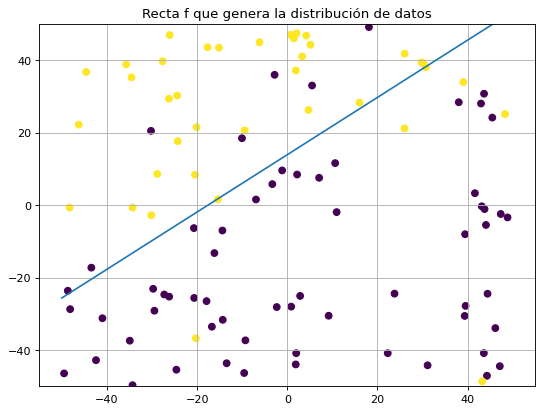

########################################
Número de iteraciones:  50000
Error_obtenido:  14
########################################


In [115]:
w_ini = np.zeros((1,3)) 
label_unifnox = labeld_unifnox[:,0]
label_unifnox = label_unifnox[:,np.newaxis]
w_unifnox,it_nox = ajusta_PLA(pla_data, label_unifnox, w_ini, max_iters=50000)
draw_PLA(pla_data,label_unifnox,[-50,50],w_unifnox[-1])
plt.show()
print("########################################")
print("Número de iteraciones: ", it_nox)
print("Error_obtenido: ", predError(pla_data,label_unifnox,w_unifnox[-1]))
print("########################################")

Claramente vemos que en una muestra no linealmente separable el número de iteraciones necesarias para nuestro algoritmo es equivalente al número máximo de iteraciones que le hemos asociado. Esto es debido a que la implementación del algoritmo termina solamente cuando separa la muestra, que sabemos de antemano que no es separable. 

In [116]:
total = 11
np.random.seed(seed)
store_data2 = np.zeros(shape=(total,2,3))
store_iter2 = np.zeros(shape=(total,1))
store_data2[0,0] = w_unifnox[0]
store_data2[0,1] = w_unifnox[-1]
store_iter2[0] = it_nox
for i in range(1,total):
  w_ini = np.random.uniform(low=0,high=1,size=(1,3))
  w_,it_ = ajusta_PLA(pla_data, label_unifnox, w_ini, max_iters=50000)
  store_data2[i,0] = w_ini
  store_data2[i,1] = w_[-1]
  store_iter2[i] = it_

avg_it = np.sum(store_iter2[:])/total
print("##### Pesos obtenidos + número de iteraciones #### ")
print(store_data2[-1,1], avg_it)
print("################################################")

##### Pesos obtenidos + número de iteraciones #### 
[-380.15766278  -16.23002294   10.94177916] 50000.0
################################################


Vemos que lo mismo pasa cuando lo inicializamos a valores aleatorios, ya que la media de iteraciones es igual al máximo asociado. 

In [117]:
avg_error = 0
best_err = 100
peso = np.zeros((1,3))
err = np.zeros(shape=(len(store_data2),1))
for num,w in enumerate(store_data2[:,-1]):
  err[num] = predError(pla_data,label_unifnox,w)
  avg_error += err[num]
  if(err[num] <= best_err):
    best_err = err[num]
    peso = w
avg_error /= len(store_data2)


#### Tabla de resultados 2: 

In [118]:
from tabulate import tabulate 
converted2 = [['Pesos Iniciales','Pesos Finales','Error','Iteraciones']]
for cont, data in enumerate(store_data2):
  converted2.append([data[0],data[1],err[cont], store_iter2[cont]])

print(tabulate(converted2))

----------------------------------  -------------------------------------------  -----  -----------
Pesos Iniciales                     Pesos Finales                                Error  Iteraciones
[0. 0. 0.]                          [-403.          -22.94492795   29.02345217]  [14.]  [50000.]
[0.45731979 0.99908604 0.26922804]  [-373.54268021  -16.16541524   10.85825841]  [18.]  [50000.]
[0.96936242 0.80057461 0.02462666]  [-395.03063758  -18.3712883    19.80143654]  [18.]  [50000.]
[0.89043994 0.91088436 0.04084652]  [-388.10956006  -11.30084679   50.36398382]  [17.]  [50000.]
[0.40294185 0.68453408 0.99270392]  [-382.59705815  -17.35829621   46.94669065]  [13.]  [50000.]
[0.3873937  0.79054245 0.47333227]  [-387.6126063    -8.67499611   55.41590998]  [18.]  [50000.]
[0.13273666 0.80441171 0.51056214]  [-400.86726334  -18.95098805   52.90690823]  [15.]  [50000.]
[0.93061919 0.09489578 0.99788716]  [-400.06938081  -20.73985099   22.58353159]  [17.]  [50000.]
[0.83787884 0.91673543 0

Aquí sí he incluido el error en la muestra, ya que al no ser linealmente separable el algoritmo puede cortar en mejor o peor posición, obteniendo rendimientos diferentes. 

In [119]:
print("#######################################################")
print("Error medio obtenido por todos los vectores aleatorios: ",avg_error)
print("Menor error obtenido:", best_err, peso)
print("#######################################################")

#######################################################
Error medio obtenido por todos los vectores aleatorios:  [16.90909091]
Menor error obtenido: [13.] [-382.59705815  -17.35829621   46.94669065]
#######################################################


Para cuando tenemos ruido en la muestra, suficiente como para transformar lo que linealmente separable en algo que ya no lo es, tenemos que imponer un limite de interaciones para el algoritmo PLA ya que no llegará a converger. Por ello la media de iteraciones para cuando inicializamos el vector a cero como para cuando tenemos valores aleatorios equivale al máximo número de iteraciones que le he permitido al algoritmo.

Respecto al error, vemos que algunas generaciones aleatorios de vectores nos ha permitido obtener mejores resultados que otros conjuntos de valores para los pesos. 

En resumen: PLA no es capaz de generar error cero para casos no linealmente separable, incluso el error varia con cada iteración, para garantizar minimizar tenemos que utilizar la varación Pocket. Los puntos de partida importan a la hora de obtener una mejor solución que otra y/o más rapidamente.

## 2.2 (4 puntos) Regresión Logística (RL).
En este ejercicio emplearemos nuestra propia función objetivo $\mathcal{f}$ y un conjunto 
de datos $\mathcal{D}$ para ver cómo funciona regresión logística. Consideraremos $d=2$ para que los datos sean fáclmente visualizables, y emplearemos
$\mathcal{X} = [0,2] \times [0,2] $ con probabilidad uniforme de elegir cada $x \in \mathcal{X} $. Elegir una línea en el plano que pase por $\mathcal{X}$ como la frontera que separa la región en donde $y$ toma valores $+1$ y $-1$. Para ello, seleccionar dos puntos aleatorios de $\mathcal{X}$ y calcular la línea que pasa por ambos. 

### Definición Teórica RL 

En estadística, la regresión logística es un tipo de análisis de regresión utilizado para predecir el resultado de una variable categórica (una variable que puede adoptar un número limitado de categorías) en función de las variables independientes o predictoras. Es útil para modelar la probabilidad de un evento ocurriendo en función de otros factores.

Como en el PLA, tendremos una función $ \sigma (f(x)) = \frac{1}{1+e^{-f(x)}}$ 
y además  
$\sigma (f(x_i)) = \begin{cases} \ge 0.5 & y_i = +1 \\ < 0.5 & y_i = -1 \end{cases} $ 

La salida está acotada entre 0 y 1, se interpreta en términos probabilísticos.
La transformación del gradiente sale de tomar $\frac{-1}{N}ln(\cdot)$ de $L_s(h)$, la máxima verosimilitud de la función. Este sería:
$ \nabla E_{in} = \frac{-1}{N}\sum_{n=1}^{N}\frac{y_nx_n}{1+e^{y_nw^t(t)x_n}}$
Para la práctica utilizaremos el aprendizaje como en el gradiente estocástico. 

El criterio de parada será cuando $||w(t+1)-w(t)||<0.01$. Dónde "t" denota la época en la que estamos. 

#### Generación de datos

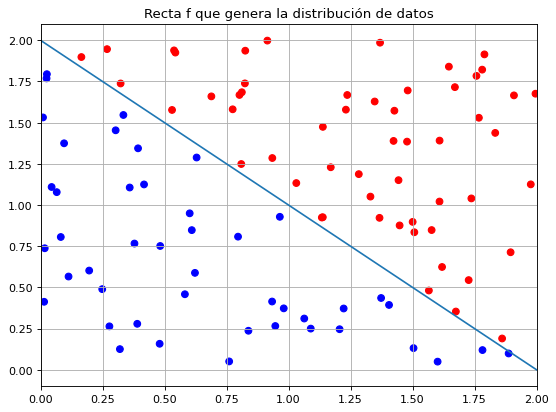

In [120]:
# Generamos los datos uniformes
datos_rl = simula_unif(100,2,[0,2],seed=140521) 
# Elegimos dos puntos aleatorios de X
# (x - p1.x) / (p2.x - p1.x) = (y - p1.y) / (p2.y - p1.y) 
p1 = [0,2]
p2 = [2,0]
frandom = lambda x: ( (x - p1[0]) / (p2[0]-p1[0]) ) * (p2[1]-p1[1]) + p1[1] 
def any_sign(x,y,function):
	return signo(function(x)-y)

# creo las etiquetas y el vector de datos etiquetados.
rl_labeld = np.zeros(shape=(len(datos_rl),3))
label_rl = np.zeros(shape=(len(datos_rl),1))
for num, datos in enumerate(datos_rl):
  label_rl[num] = any_sign(datos[0],datos[1],frandom)
  results = np.array([label_rl[num],datos[0],datos[1]],dtype=object)
  rl_labeld[num] = results

rl_data = get_dataFrom(datos_rl)
draw_function(rl_labeld,[0,2],frandom)
plt.show()

### Impleméntese RL con Gradiente Descendente Estocástico (SGD) del siguiente modo:

- Inicializar el vector de pesos con valores 0.
- Parar el algoritmo cuando $||w^{(t+1)} - w^{(t)}|| < 0.01$, donde $w(t)$ denota el vector de pesos al final de la época t. Recuérdese que una época es un pase completo a través de los N ejemplos de nuestro conjunto de datos.
- Aplicar una permutación aleatoria de {1, 2, ..., N} a los índices de los datos, antes de usarlos en cada eṕoca del algoritmo.

In [121]:
def gradE(x,y,w): 
  return -np.sum((y*x)/(1+np.exp(y*(x@w.T))),axis=0)/len(x)

def EinRL(x,y,w):
  return np.sum(np.log( 1+np.exp(-y*x@w.T) ) )/len(x) 


In [122]:
from sklearn.utils import shuffle 
def ajusta_RL(x, y, w_ini, eta, function, batch_size=32,max_iters=100000,no_max=False,no_diff=False):
  w = w_ini.copy()
  no_changes = False
  epoch = it = 0
  data_sz = len(y)
  if(batch_size>=data_sz):
    batch_size = data_sz
  if(batch_size<=0):
    batch_size = 0
  while(not no_changes and (it<max_iters or no_max)):
    shuffled_x, shuffled_y = shuffle(x,y,random_state=0)
    for i in range(0,len(shuffled_y),batch_size):
      batch_x = np.array(shuffled_x[i:i+batch_size])
      batch_x = np.stack(batch_x)
      batch_y = np.array(shuffled_y[i:i+batch_size])
      batch_y = np.stack(batch_y)
      batch_x = np.array(batch_x,dtype=np.float64)    
      batch_y = np.array(batch_y,dtype=np.float64) 
      w_new = w_ini - eta * function(batch_x,batch_y,w_ini) 
      it += 1
      if((it>=max_iters and not no_max)): break
      if(i+batch_size < data_sz): w_ini = w_new.copy()
    epoch += 1
    w = np.vstack((w,w_new)) 
    if(np.sum(np.abs(w[-1]-w_ini[-1]))<0.01 and not no_diff):
      no_changes = True
    w_ini[-1] = w[-1].copy()

  return w,it,epoch

### A continuación, empleando la implementación anterior, realícese el siguiente experimento: 
- Seleccione $ N = 100 $ puntos aleatorios {$x_n$} de $\mathcal{X}$ y evalúe las respuestas {$y_n$} de todos ellos respecto de la forntera elegida. 
- Ejecute RL para encontrar la función solución g, y evalúe el Error $E_{out}$ usando para ello una nueva muestra de datos (> 999). Se debe escoger experimentalmente tanto el learning rate (tasa de aprendijaze $\eta$) como el tamaño del batch.
- Repita el exprimento 100 veces, y calcule los valores promedio de E_{out}, de porcentaje de error de clasificación, y de épocas necesarias para converger. 

### Pesos obtenidos + iteraciones + diferencia entre épocas ###
[ 30.56845168 -15.43814971 -15.68662265] 20594 0.007272814241568781
E_{in}(h): 0.04524051170992393
Mal-clasificados 1
########################################


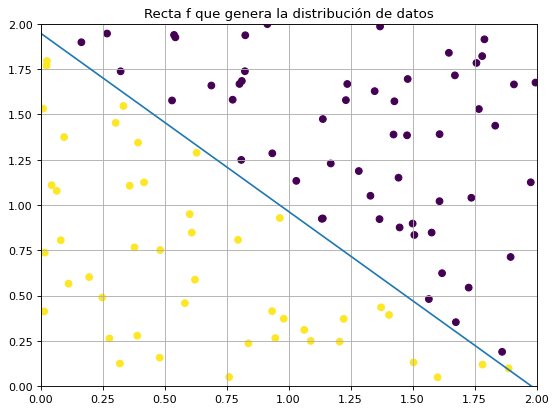

In [161]:
x = rl_data
y = label_rl 
w_ini = np.zeros(shape=(1,3),dtype=np.float64)

rl_w, it,_  = ajusta_RL(x,y,w_ini,0.5,gradE,batch_size=16,no_max=True)
print("### Pesos obtenidos + iteraciones + diferencia entre épocas ###")
print(rl_w[-1],it,np.sum(np.abs(rl_w[-2]-rl_w[-1])))
print("E_{in}(h):", EinRL(x,y,rl_w[-1]))
print("Mal-clasificados", predError(x,y,rl_w[-1]))
print("########################################")
draw_PLA(x,y,[0,2],rl_w[-1])
plt.ylim(0,2)
plt.xlim(0,2)
plt.show()

Con este intento podemos observar rápidamente que el comportamiento del algoritmo es correcto, ahora solamente quedaría experimentar y buscar los mejores valores de los hiper-parámetros. 

#### Búsqueda aleatoria de hiper-parámetros.

He decidido primeramente realizar unos intentos a "ciegas" para ver como reacciona el algoritmo respecto a tiempo de cómputo y entre otros antes de establecer los parámetros del algoritmo de test de hiper-parámetros.

In [166]:
rl_w2, it2,_  = ajusta_RL(x,y,w_ini,0.7,gradE,batch_size=64,no_max=True)
print("########################################")
print(rl_w2[-1],it2,np.sum(np.abs(rl_w2[-2]-rl_w2[-1])))
print("E_{in}(h):", EinRL(x,y,rl_w2[-1]))
print("MalClasificados:", predError(x,y,rl_w2[-1]))
print("########################################")

########################################
[ 9.44673446 -4.89070707 -4.9219639 ] 598 0.024651157368462684
E_{in}(h): 0.14364124053289548
MalClasificados: 1
########################################


In [167]:
rl_w3, it3, _= ajusta_RL(x,y,w_ini,1,gradE,batch_size=128,no_max=True)
print("########################################")
print(rl_w3[-1],it3,np.sum(np.abs(rl_w3[-2]-rl_w3[-1])))
print("E_{in}(h):", EinRL(x,y,rl_w3[-1]))
print("MalClasificados:", predError(x,y,rl_w3[-1]))
print("########################################")


########################################
[13.23775301 -6.78028567 -6.84635561] 992 0.009993537566118427
E_{in}(h): 0.10539803692881831
MalClasificados: 1
########################################


In [168]:
rl_w4, it4, _ = ajusta_RL(x,y,w_ini,1,gradE,batch_size=1,no_max=True)
print("########################################")
print(rl_w4[-1],it4,np.sum(np.abs(rl_w4[-2]-rl_w4[-1])))
print("E_{in}(h):", EinRL(x,y,rl_w4[-1]))
print("MalClasificados:", predError(x,y,rl_w4[-1]))
print("########################################")

########################################
[ 35.39065216 -18.28989592 -18.55699414] 10700 0.22248756760202326
E_{in}(h): 0.04716478911599552
MalClasificados: 2
########################################


Este conjunto ha sido el que más grande cota de iteraciones me ha devuelto...

In [169]:
rl_w5, it5,_= ajusta_RL(x,y,w_ini,0.1,gradE,batch_size=128,no_max=True)
print("########################################")
print(rl_w5[-1],it5,np.sum(np.abs(rl_w5[-2]-rl_w5[-1])))
print("E_{in}(h):", EinRL(x,y,rl_w5[-1]))
print("MalClasificados:", predError(x,y,rl_w5[-1]))
print("########################################")

########################################
[13.23825098 -6.78053421 -6.84660777] 1 0.0009986756862492285
E_{in}(h): 0.10539430367259228
MalClasificados: 1
########################################


Este me ha devuelto una solución instantanea...mejor verifiquemos los resultados: 

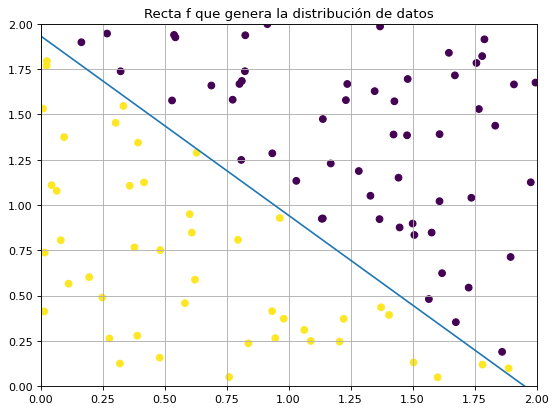

In [170]:
draw_PLA(x,y,[0,2],rl_w5[-1])
plt.ylim(0,2)
plt.xlim(0,2)
plt.show()

In [165]:
print("#### Error de Clasificación ### ")
print("E_{in}(h):", EinRL(x,y,rl_w5[-1]))
print("MalClasificados:", predError(x,y,rl_w5[-1]))
print("############################")

#### Error de Clasificación ### 
E_{in}(h): 0.38175639946248213
MalClasificados: 11
############################


In [129]:
%timeit rl_w, it, _ = ajusta_RL(x,y,w_ini,0.3,gradE,batch_size=16,max_iters=10000,no_max=False)

1 loop, best of 5: 1.3 s per loop


Con estos pequeños tests creo que impondre un límite de 10.000 iteraciones para que no tengamos que esperar demasiado a que converja nuestro test de 60 combinaciones, y luego miraré la tabla resultante y elegiré una pareja acorde; Luego además verificaré que los resultados de la media son adecuados:

In [130]:
learning_r = np.linspace(0.1,1,10)
batch_sizes = np.array([1,8,16,32,64,128])
#learning_r = np.array([0.5,1])
#batch_sizes = np.array([64,128])
interval = [0, 2]
eout = miss = it = epoch = 0
train_sz = 100
test_sz = 1000
train_y = np.zeros(shape=(train_sz,1))
test_y = np.zeros(shape=(test_sz,1))
results = np.zeros(shape=(len(learning_r),len(batch_sizes),4))
for row, eta in enumerate(learning_r): 
  for col, batch in enumerate(batch_sizes): 
    w_ini = np.zeros(shape=(1,3))
    train_x = simula_unif(train_sz,2,interval,complete=True) 
    #train_y = np.zeros(shape=(len(train_x),1))
    for num, datos in enumerate(train_x):
      train_y[num] = any_sign(datos[1],datos[2],frandom)
  
    temp_w, temp_it,epoch = ajusta_RL(train_x,train_y,w_ini,eta,gradE,batch_size=batch,max_iters=10000)
  
    test_x = simula_unif(test_sz,2,interval,complete=True) 
    #test_y = np.zeros(shape=(len(test_x),1))
    for num, datos in enumerate(test_x):
      test_y[num] = any_sign(datos[1],datos[2],frandom)
  
    eout = EinRL(test_x,test_y,temp_w[-1])
    miss = predError(test_x,test_y,temp_w[-1])
    it = temp_it

    results[row,col] = np.array([eout,miss,it,epoch])

In [131]:
vector = np.zeros(shape=(1,results.shape[2]),dtype=np.float16)
arr = np.zeros(shape=(2,results.shape[2]),dtype=np.float16)
var = -1
separator = "---------------------------\t"
title = "E_out + Miss + Iter + Epoch\t"
print("\t"+title*results.shape[1],end='')
print("\n\t",separator*results.shape[1])
for x, row in enumerate(results): 
  print("eta={:.2f}  ".format(learning_r[x]),end='')
  for j,col in enumerate(row):
    for i in range(0,results.shape[2]):
      var = np.float16(col[i])
      if(i%2==0 and i>0):
        print("| ",end='')
      print("{:.2f} ".format(var),end='')
    print("\t",end='')
  
  print("\n\t",separator*results.shape[1])

for var in range(0,results.shape[1]):
  print("\tBatch_size={:.2f}  \t".format(batch_sizes[var]),end='')


	E_out + Miss + Iter + Epoch	E_out + Miss + Iter + Epoch	E_out + Miss + Iter + Epoch	E_out + Miss + Iter + Epoch	E_out + Miss + Iter + Epoch	E_out + Miss + Iter + Epoch	
	 ---------------------------	---------------------------	---------------------------	---------------------------	---------------------------	---------------------------	
eta=0.10  0.12 30.00 | 8496.00 85.00 	0.13 47.00 | 10000.00 770.00 	0.15 29.00 | 6328.00 904.00 	0.12 27.00 | 10000.00 2500.00 	0.23 42.00 | 1394.00 697.00 	0.39 86.00 | 373.00 373.00 	
	 ---------------------------	---------------------------	---------------------------	---------------------------	---------------------------	---------------------------	
eta=0.20  0.09 23.00 | 10000.00 100.00 	0.09 27.00 | 10000.00 770.00 	0.09 17.00 | 10000.00 1429.00 	0.15 32.00 | 2280.00 570.00 	0.21 32.00 | 998.00 499.00 	0.26 47.00 | 551.00 551.00 	
	 ---------------------------	---------------------------	---------------------------	---------------------------	-

Vemos que al utilizar todo el conjunto de entrenamiento de una vez, con un factor de aprendizaje pequeño, para este conjunto de datos hemos obtenidos muy buenos resultados respecto a la velocidad a la que converge. 

Tras haber probado con diversos valores, algunos incluso que no se denotan en las tablas anteriores, he tenido que buscar aquel par de valores que me permitiera converger rápido y a la vez mantener mi precisión a la hora de clasificar, el resultado final será el de la tabla para $eta=1$ y $batch\_size=128$ por qué como denota en la tabla, con apena 1109 épocas/iteraciones hemos obtenido un $E_{out}(h)=0.11$ y con apenas 2 mal-clasificados; 

Aunque no sea el $E_{out}(h)$ más pequeño, creo que es un punto intermedio entre velocidad / precisión.

#### Valores medios obtenidos en RL + análisis

In [132]:
N = 100
interval = [0, 2]
avg_miss = avg_it = avg_epoch = avg_eout = 0
train_sz = 100
test_sz = 1000
train_y = np.zeros(shape=(train_sz,1))
test_y = np.zeros(shape=(test_sz,1))
eta = 1
batch = 128
for i in range(0,N): 
  w_ini = np.zeros(shape=(1,3),dtype=np.float64)
  train_x = simula_unif(train_sz,2,interval,complete=True) 
  #train_y = np.zeros(shape=(len(train_x),1))
  for num, datos in enumerate(train_x):
    train_y[num] = any_sign(datos[1],datos[2],frandom)

  temp_w, temp_it,epoch = ajusta_RL(train_x,train_y,w_ini,eta,gradE,batch_size=batch,no_max=True)

  test_x = simula_unif(test_sz,2,interval,complete=True) 
  #test_y = np.zeros(shape=(len(test_x),1))
  for num, datos in enumerate(test_x):
    test_y[num] = any_sign(datos[1],datos[2],frandom)

  avg_eout += EinRL(test_x,test_y,temp_w[-1])
  avg_miss += predError(test_x,test_y,temp_w[-1])
  avg_it += temp_it
  avg_epoch += epoch

avg_eout /= N
avg_miss /= N
avg_it /= N
avg_epoch /= N

print("######## Medias Obtenidas #######")
print("MissClasification", avg_miss)
print("E_{out}(h):", avg_eout)
print("Mean_iter:", avg_it)
print("Mean_Epoch:", avg_epoch)
print("#################################")

######## Medias Obtenidas #######
MissClasification 23.01
E_{out}(h): 0.11730463156231091
Mean_iter: 1043.49
Mean_Epoch: 1043.49
#################################


He optado al final a utilizar $\eta = 1$ y $batch\_size=128$ ya que la combinación que me ha permitido en 1 minuto obtener buenos resultados fuera de la muestra. Por lo que creo que es la combinación que mejor equilibra la balanza entre rendimiento y precisión. 

Con estos hiper-parámetros solamente hemos malclasificados alrededor de 25 puntos sobre el conjunto de test, lo que equivale a un 3% del total. Además hemos obtenido un $E_{out}(h)$ muy cercano a cero. Todo ello con apenas alrededor de 1000 iteraciones sobre la muestra entera, o también 1000 épocas;

Vemos claramente con los resultados obtenidos que hemos logrado aproximar nuestra función objetivo f correctamente con esta combinación; Ya que podríamos incluso suponer que los malclasificados sean ocasionado por puntos frontera, una inorportuna distribución de datos de entrenamiento y entre otros factores.

# 3. BONUS (1.5 puntos)
## Clasificación de Dígitos. 
Considerar el conjunto de datos de dígitos manuscritos, y seleccionar las muestras de de los digitos 4 y 8. Extraer las características de intensidad promedio y simetría en la manera que se indicó en el ejercicio 3 de la práctica anterior.

In [133]:
from google.colab import drive 
drive.mount('/content/drive')
!ls /content/drive/MyDrive/datos

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
X_test.npy  X_train.npy  y_test.npy  y_train.npy


## B.1. Plantear un problema de clasificación binaria que considera el conjunto de entrenamiento como datos de entrada para aprender la función g. 

Tendremos ahora el mismo problema de clasificación que en la práctica anterior, pero en este caso lo haremos sobre los dígitos 4 y 8. Dónde tendremos características como lo son la simetría y la intensidad del número escrito. 
Utilizaremos la siguiente función para leer los datos: 

In [134]:
# Función para leer los datos.
def readData(file_x, file_y):
  first_label = 1
  second_label = -1
  interval = [4,8]
  
  # Leemos los ficheros	
  datax = np.load(file_x)
  datay = np.load(file_y)
  y = []
  x = []	
  # Solo guardamos los datos cuya clase sea la 1 o la 5
  for i in range(0,datay.size):
    if datay[i] == interval[0] or datay[i] == interval[1]:
      if datay[i] == interval[0]:
        y.append(first_label)
      else:
        y.append(second_label)
      x.append(np.array([1, datax[i][0], datax[i][1]]))
      
  x = np.array(x, np.float64)
  y = np.array(y, np.float64)
  
  return x, y

Con esta función, al leer los datos estoy asignando el valor positivo 1 al digito 4 y el valor negativo -1 al digito 8.

In [135]:
x_train, y_train = readData('/content/drive/MyDrive/datos/X_train.npy','/content/drive/MyDrive/datos/y_train.npy')
x_test, y_test = readData('/content/drive/MyDrive/datos/X_test.npy','/content/drive/MyDrive/datos/y_test.npy')
print("##### Arreglando el shape ####")
print(x_train.shape,y_train.shape)
y_train = y_train[:,np.newaxis]
print(y_train.shape)
print(x_test.shape,y_test.shape)
y_test = y_test[:,np.newaxis]
print(y_test.shape)
print("############################")

##### Arreglando el shape ####
(1194, 3) (1194,)
(1194, 1)
(366, 3) (366,)
(366, 1)
############################


## B.2. Compárense los modelos de regresión lineal PLA, RL, PLA-Pocket.

### B.2.a) Generar gráficos separados de los datos de entrenamiento y test junto con la función estimada.

#### B.2.b) Calcular $E_{in}$ y $E_{out}$ (error sobre los datos de test).

In [136]:
def drawWithError(x,y, interval, weights,it=0):
  fig, ax = plt.subplots(1,2,dpi=80,figsize=(8,6))
  fig.tight_layout()
  ax[0].scatter(x[:,1],x[:,2], c=y[:])
  valores = np.linspace(interval[0],interval[1],x.shape[0])
  function = lambda x: ( weights[-1,0] + x*weights[-1,1] ) / -weights[-1,2]
  ax[0].plot(valores,function(valores))
  ax[0].set_title("Conjunto de entrenamiento")
  ax[0].grid()
  interval = np.arange(0,len(weights),1)
  ax[1].set_title("Total mal-clasificado obtenidos")
  valores = []
  for w in weights: 
    valores.append(predError(x,y,w))
  if(it!=0): 
    for i in range(0,it-len(valores)):
      valores.append(predError(x,y,weights[-1]))
    interval = np.arange(0,len(valores),1)
  ax[1].plot(interval, valores)
  ax[1].grid()

  return ax

#### Dibujado de Frontera de decisión

In [137]:
import matplotlib.pyplot as plt
import matplotlib.colors 
import numpy as np
'''
La función busca dibujar una línea de decisión según los valores pasados sobreescribiendo un
scatter plot realizado sobre los datos de entrada.

Parameters
-------------
** Apenas definiré los nuevos en relación a lo visto anteriormente
x_test : np.array()
  Conjunto de muestra de testeo, disjunta a las muestras de entrenamiento
y_test : np.array()
  Conjunto de etiquetas de testeo, pareja de x_test
xtitle : string 
  Titulo del eje X
ytitle : string
  Titulo del eje y
pred : puntero a funcion
  La idea era permitir pasar la función de la frontra de decisión
'''
def decision_boundary(w,x,y,x_test=np.array([None]),y_test=np.array([None]),xtitle="",ytitle="",pred=None):
  # Tenemos que hacer un mapeado de color 
  colors = ['purple','yellow']
  colormap = matplotlib.colors.ListedColormap(colors)

  # Creating figure
  Multiple = False
  if(x_test.any()!=None):
    fig, ax = plt.subplots(1,2,figsize=(8,6),dpi=80)
    Multiple = True
  else:
    fig, ax = plt.subplots(1,1,figsize=(8,6),dpi=80)
  # add a big axis, hide frame
  fig.add_subplot(111, frameon=False)
  # hide tick and tick label of the big axis
  plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
  plt.xlabel(xtitle)
  plt.ylabel(ytitle)

  if pred==None:
    pred = lambda x:-(w[0] + w[1]*x)/w[2]

  if(Multiple):
    ax[0].scatter(x[:,1], x[:,2], c = y[:],cmap=colormap)
    ax[0].plot(x[:,1],pred(x[:,1]),color='black')
    ax[0].set_title("Muestra de entreno")

    ax[1].scatter(x_test[:,1], x_test[:,2], c = y_test[:],cmap=colormap)
    ax[1].plot(x_test[:,1],pred(x_test[:,1]),color='black')
    ax[1].set_title("Muestra de testeo")
  else:
    ax.scatter(x[:,1], x[:,2], c = y[:],cmap=colormap)
    ax.plot(x[:,1],pred(x[:,1]),color='black')
    ax.set_title("Muestra de entreno")

  return ax


#### Regresión Lineal: 

In [138]:
# Si aseguramos que existe una inversa podríamos usar esta,
# Lo he utilizado para comprobar valores.
def inversa_matrix(x,y):
  return np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)

# Definimos lo que sería el cálculo de la matriz inversa.
# Wronge returned value in svd: https://stackoverflow.com/questions/59228672/having-problems-using-numpy-linalg-svd
def svd(x,y):
  u,d,vt = np.linalg.svd(x,full_matrices=False)
  dd = np.diag(d)
  # X^T = V * D * U^T
  x_T = vt.T @ dd @ u.T
  # We know that U^T * U = I (Identity); We can avoid that
  # X^T * X = V DD V^T
  to_inv = vt.T@dd@dd@vt
  # pseudo = (X^T * X)^-1 * X^T
  inverted = np.linalg.inv(to_inv)
  pseudo = np.dot(inverted,x_T)
  # w = pseudo * y
  return np.dot(pseudo,y)


In [139]:
lin_w = svd(x_train,y_train)
lin_w = lin_w.T

##### Gŕafica para conjunto de entrenamiento #####
Pesos obtenidos:  [ 0.50676351 -8.25119739 -0.44464113]
Porcentaje de MalClasificados Entreno: 22.780569514237854
Porcentaje de E_in(h) 0.6428532963367775
Porcentaje de MalClasificados test: 25.136612021857925
Porcentaje de E_out(h) 0.7087148141159973
###############################################


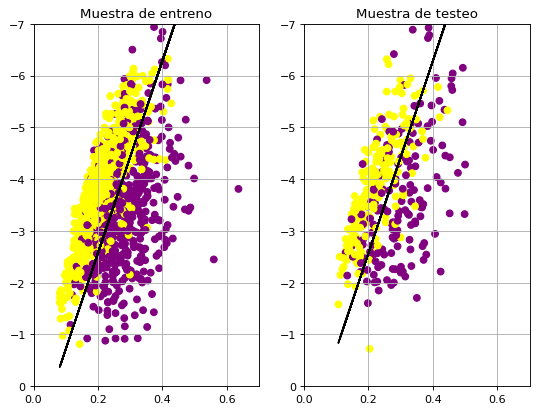

<Figure size 800x640 with 0 Axes>

In [140]:
def EinSVD(x,y,w):
  return np.sum((((x@w.T)-y)**2))/len(x)

print("##### Gŕafica para conjunto de entrenamiento #####")
print("Pesos obtenidos: ", lin_w[-1])
print("Porcentaje de MalClasificados Entreno:",predError(x_train,y_train,lin_w[-1])/len(x_train) *100)
print("Valor de E_in(h)",EinSVD(x_train,y_train,lin_w))
print("Porcentaje de MalClasificados test:",predError(x_test,y_test,lin_w[-1])/len(y_test) *100)
print("Valor de E_out(h)",EinSVD(x_test,y_test,lin_w))
print("###############################################")
ax = decision_boundary(lin_w[-1],x_train,y_train,x_test,y_test)
ax[0].grid() 
ax[0].set_ylim((0,-7))
ax[0].set_xlim((0,0.7))
ax[1].grid()
ax[1].set_ylim((0,-7))
ax[1].set_xlim((0,0.7))
plt.figure(dpi=80,figsize=(10,8))
plt.show()
plt.show()

He optado por utilizar la pseudo-inversa para la regresión lineal, con ella he obtenido un total de aciertos del 85% aproximadamente y con un error cuadrático sobre la muestra del 0.7;
Veremos que resultados llegaremos a obtener con los demás algoritmos.

#### Regresión Logística:

Aquí, curiosamente he encontrado que la misma pareja de hiper-parámetros utilizado anteriormente no funciona como esperado para este conjunto de datos; Por lo que tras un par de pruebas menos extensas con los valores que antes me habían convencido he encontrado que la pareja más rápida y con mejores resultados de este problema es $eta = 0.5$ y $Batch\_size=128$:

In [141]:
w_ini = np.zeros(shape=(1,x_train.shape[1]),dtype=np.float64)
brl_w, brl_it, brl_ep = ajusta_RL(x_train,y_train,w_ini,0.5,gradE,batch_size=128,max_iters=50000)
print("###### Resultados obtenidos #####")
print("Pesos:", brl_w[-1])
print("Iteraciones:", brl_it)
print("Épocas:", brl_ep)
print("#################################")

###### Resultados obtenidos #####
Pesos: [ -0.03300478 -10.65883082  -0.80494678]
Iteraciones: 1630
Épocas: 163
#################################


Vemos que aunque haya impuesto un máximo de 50000 iteraciones, hemos cortado antes por el criterio de parada. Sin embargo, he probado utilizar el parámetro no_diff de la función para ejecutar las 50000 iteraciones y aún así obtuve similares resultados a los que se enseñan a continuación: 

##### Gŕafica para conjunto de entrenamiento #####
Porcentaje de MalClasificados(h) 22.69681742043551
E_{in}(h) 0.5280086433864333
###############################################


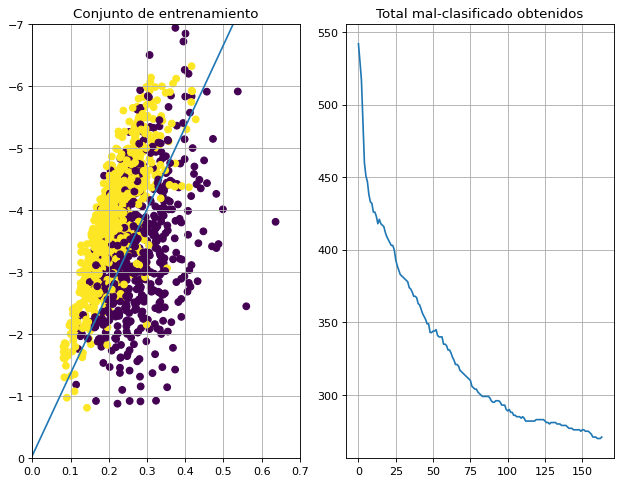

In [142]:
print("##### Gŕafica para conjunto de entrenamiento #####")
ax = drawWithError(x_train,y_train,[0,1],brl_w)
print("Porcentaje de MalClasificados(h)",predError(x_train,y_train,brl_w[-1])/len(x_train) *100)
print("E_{in}(h)",EinRL(x_train,y_train,brl_w[-1]))
print("###############################################")
ax[0].set_ylim((0,-7))
ax[0].set_xlim((0,0.7))
plt.show()

Hemos obtenido resultados similares respecto al porcentaje de aciertos de nuestro algoritmo sobre le conjunto de datos de entrenamiento. Sin embargo, podemos ver que el error E_in sobre la muestra es mucho menor, por lo que podríamos esperar obtener mejores resultados fuera de la muestra. Veremos:

##### Gŕafica para conjunto de test #####
Porcentaje de MalClasificados Test 25.136612021857925
Porcentaje de E_out(h) 0.5565088843042317
###############################################


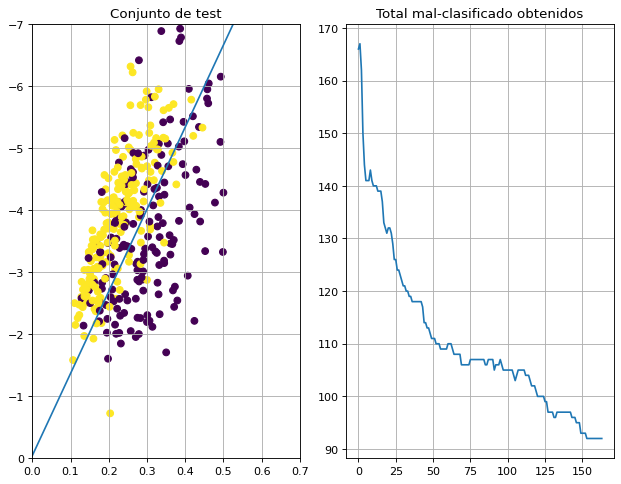

In [143]:
print("##### Gŕafica para conjunto de test #####")
print("Porcentaje de MalClasificados Test",predError(x_test,y_test,brl_w[-1])/len(x_test) *100)
print("Valor de E_out(h)",EinRL(x_test,y_test,brl_w[-1]))
ax = drawWithError(x_test,y_test,[0,1],brl_w)
print("###############################################")
ax[0].set_title("Conjunto de test")
ax[0].set_ylim((0,-7))
ax[0].set_xlim((0,0.7))
plt.show()

Como bien hemos mencionado anteriormente, hemos logrado obtener una tasa de aciertos mejor que con la pseudo inversa por 1% con un total de 86% aproximadamente. Además nuestro error fuera de la muestra es de una magnitud de 0.1 más pequeña. Sola falta verificar las otras dos variaciones: 

### PLA

In [144]:
w_ini = np.zeros(shape=(1,x_train.shape[1]),dtype=np.float64)
bpla_w, bpla_it = ajusta_PLA(x_train,y_train,w_ini,max_iters=150005,no_max=False)
print("###### Resultados obtenidos #####")
print("Pesos:", bpla_w[-1])
print("Iteraciones:", bpla_it)
print("#################################")

###### Resultados obtenidos #####
Pesos: [   6.         -170.48476651   -6.2145625 ]
Iteraciones: 150005
#################################


##### Gŕafica para conjunto de entrenamiento #####
Porcentaje de E_in(h) 578
###############################################


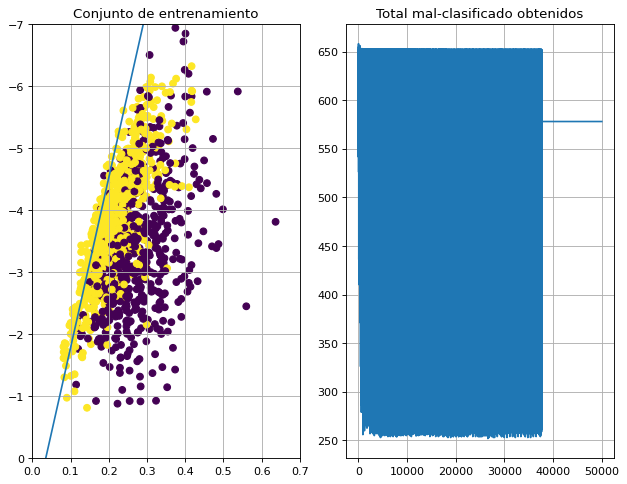

In [171]:
print("##### Gŕafica para conjunto de entrenamiento #####")
ax = drawWithError(x_train,y_train,[0,1],bpla_w,50000)
print("Porcentaje de MalClasificados:",predError(x_train,y_train,bpla_w[-1])/len(x_train)*100)
print("###############################################")
ax[0].set_ylim((0,-7))
ax[0].set_xlim((0,0.7))
plt.show()

Esta versión del perceptron como vemos no ha logrado obtener muy buenos resultados para los pesos finales obtenidos. Aun que vemos claramente en la gráfica que no es el mejor resultado (He forzado que ocurra esto, aún así es muy interesante la tremenda cantidad de variación que puede haber entre cada iteración en el perceptrón), esto se resuelve con la variación Pocket, ya que hemos cortado las iteraciones dado que sabemos que la muestra no es linealmente separable.

##### Gŕafica para conjunto de test #####
Porcentaje de E_out(h) 50.0
###############################################


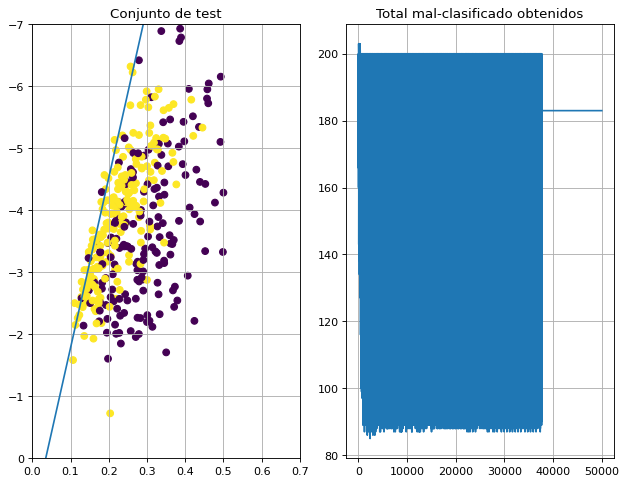

In [146]:
print("##### Gŕafica para conjunto de test #####")
print("Porcentaje de MalClasificados:",predError(x_test,y_test,bpla_w[-1])/len(x_test) *100)
ax = drawWithError(x_test,y_test,[0,1],bpla_w,50000)
print("###############################################")
ax[0].set_title("Conjunto de test")
ax[0].set_ylim((0,-7))
ax[0].set_xlim((0,0.7))
plt.show()

Sobre el conjunto de test pasa algo muy similar. Por ahora diría por evidencia empirica que el algoritmo PLA es el peor de ellos para clasificar, pero antes habría que verificar los resultados de la variación, ya que me gustaría saber el mínimo que ha alcanzado.

(Curiosamente, este conjunto de imposiciones ha ocasionado que acierte el 50% de la muestra).

### Pocket PLA

In [147]:
w_ini = np.zeros(shape=(1,x_train.shape[1]),dtype=np.float64)
bppla_w, bppla_it = ajusta_PLA(x_train,y_train,w_ini,max_iters=150005,no_max=False,Pocket=True)
print("###### Resultados obtenidos #####")
print("Pesos:", bppla_w[-1])
print("Iteraciones:", bppla_it)
print("#################################")

###### Resultados obtenidos #####
Pesos: [   9.         -169.26548702   -9.289875  ]
Iteraciones: 150005
#################################


##### Gŕafica para conjunto de entrenamiento #####
Porcentaje de E_in(h) 21.105527638190953
###############################################


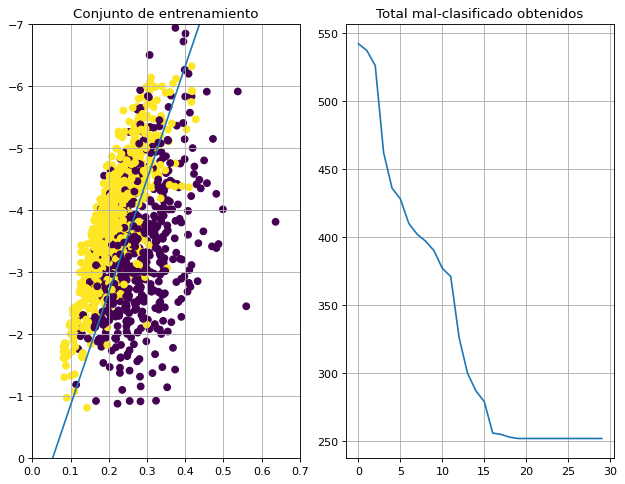

In [148]:
print("##### Gŕafica para conjunto de entrenamiento #####")
ax = drawWithError(x_train,y_train,[0,1],bppla_w,30)
print("Porcentaje de MalClasificados",predError(x_train,y_train,bppla_w[-1])/len(x_train) *100)
print("###############################################")
ax[0].set_ylim((0,-7))
ax[0].set_xlim((0,0.7))
plt.show()

Es brutal la diferencia en la gráfica de la derecha del total mal-clasificados con respecto a la primera implementación. Esta variación asegura que no guardamos soluciones peores y lo único que puede pasar es que alcanzemos un mínimo. Vemos que hemos obtenido con las mismas iteraciones el mejor clasificador que con los demás algoritmos. Veremos como se comporta en test: 

##### Gŕafica para conjunto de test #####
Porcentaje de E_out(h) 25.136612021857925
###############################################


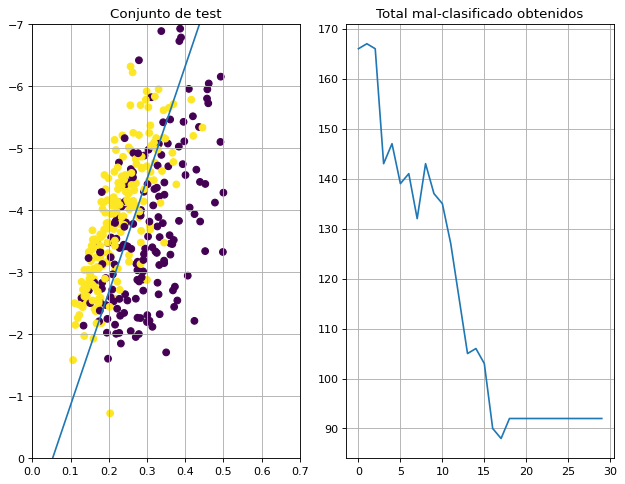

In [149]:
print("##### Gŕafica para conjunto de test #####")
ax = drawWithError(x_test,y_test,[0,1],bppla_w,30)
print("Porcentaje de MalClasificados",predError(x_test,y_test,bppla_w[-1])/len(x_test) *100)
print("###############################################")
ax[0].set_ylim((0,-7))
ax[0].set_xlim((0,0.7))
ax[0].set_title("Conjunto de test")
plt.show()

Es curioso, ya que hemos obtenidos exactamente los mismos resultados que en los demás algoritmos. Lo más interesante es verificar que una de las soluciones que resulta no ser la mejor del conjunto de muestras es la mejor fuera de ella. Podemos observar-lo alrededor de la iteración 17-18. 

#### Conclusión y análisis.

En contra de lo esperado a priori, me he deparado con que los tres algoritmos poseen rendimientos relativamente equivalentes respecto al problema de los dígitos (Obviando la implementación PLA sin Pocket). Algunas diferencias claras se encuentra en la relación rendimiento / tiempo. Ya que algunos algoritmos han necesitado mayor cantidad de tiempo y cómputo para alcanzar la misma solución.

Otra cosa es la variación del error en la muestra a medida que avanza el algoritmo. Destaca sobre todo la versión PLA. Que podemos ver que esa variación no tiene en cuenta si el camino lleva a un mínimo o no, si no que apenas toma decisiones "en el momento", cuando se equivoca clasificando. 

A mi personalmente, viendo que al parecer el error en todos aparenta similar, a priori diría que sería más fácil utilizar la pseudo-inversa ya que nos garantiza una solución al momento sin tener que iterar o jugar con los hiper-parámetros. 

### B.2.c) Si se emplean los pesos obtenidos con regresión lineal para inicializar los otros tres métodos (RL, PLA, PLA-Pocket), ¿Se observa alguna mejora en los resultados en algún nivel? Justifique la respuesta.

#### Regresión Lineal a Regresión Logística

In [150]:
w_ini = lin_w.copy()
brlin_w, brlin_it, brlin_ep = ajusta_RL(x_train,y_train,w_ini,0.5,gradE,batch_size=128,max_iters=50000,no_max=False)
print("###### Resultados obtenidos #####")
print("Pesos:", brlin_w[-1])
print("Iteraciones:", brlin_it)
print("Épocas:", brlin_ep)
print("#################################")

###### Resultados obtenidos #####
Pesos: [ 2.62971632e-03 -1.08716200e+01 -8.09089843e-01]
Iteraciones: 530
Épocas: 53
#################################


##### Gŕafica para conjunto de entrenamiento #####
Porcentaje de MalClasificados: 22.780569514237854
Porcentaje de E_in(h): 0.526159452997872
###############################################


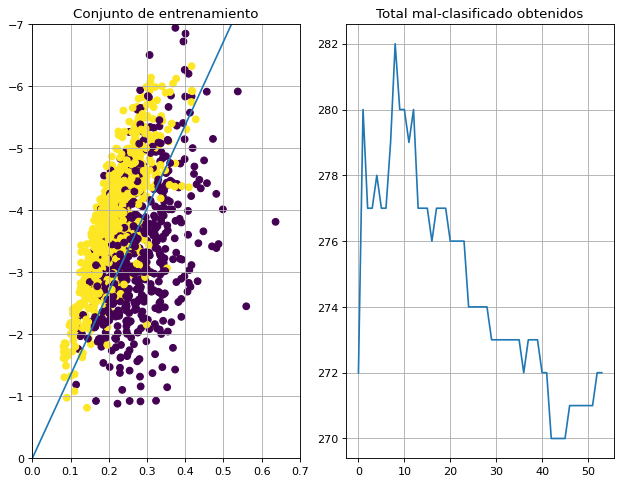

In [151]:
print("##### Gŕafica para conjunto de entrenamiento #####")
ax = drawWithError(x_train,y_train,[0,1],brlin_w)
print("Porcentaje de MalClasificados:",predError(x_train,y_train,brlin_w[-1])/len(x_train) *100)
print("Valor de E_in(h):",EinRL(x_train,y_train,brlin_w[-1]))
print("###############################################")
ax[0].set_ylim((0,-7))
ax[0].set_xlim((0,0.7))
plt.show()


##### Gŕafica para conjunto de test #####
Porcentaje de MalClasificados 25.136612021857925
Porcentaje de E_out(h) 0.5546961998766717
###############################################


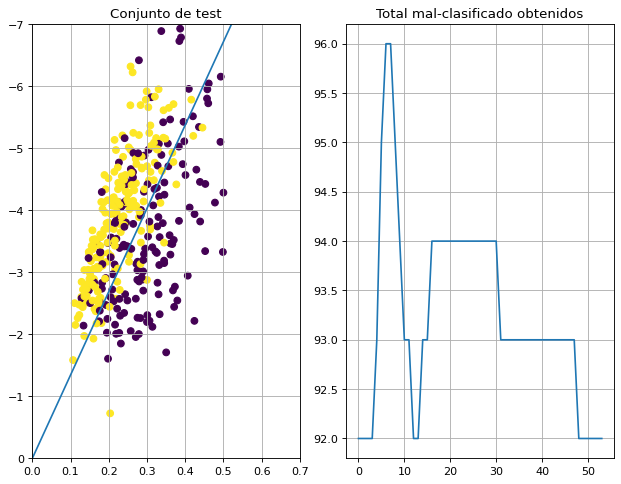

In [152]:
print("##### Gŕafica para conjunto de test #####")
print("Porcentaje de MalClasificados",predError(x_test,y_test,brlin_w[-1])/len(x_test) *100)
print("Valor de E_out(h)",EinRL(x_test,y_test,brlin_w[-1]))
ax = drawWithError(x_test,y_test,[0,1],brlin_w)
print("###############################################")
ax[0].set_title("Conjunto de test")
ax[0].set_ylim((0,-7))
ax[0].set_xlim((0,0.7))
plt.show()

Lo que observo al emplear la regresión lineal como punto de partida es que regresión logística al no utilizar la condición como el Pocket, permite que empeore la situación, mucho más evidente en el gráfico de entrenamiento.

Sin embargo, ha llegado a converger con el mismo porcentaje de clasificación. La diferencia evidente es al tiempo de cómputo, ya que con tan solo 53 épocas hemos convergido. Por lo que utilizar regresión lineal para regresión logística nos permite incrementar el rendimiento del algoritmo. 

#### Regresión Lineal a PLA

In [153]:
w_ini = lin_w.copy()
bpla2_w, bpla2_it = ajusta_PLA(x_train,y_train,w_ini,max_iters=150005,no_max=False)
print("###### Resultados obtenidos #####")
print("Pesos:", bpla2_w[-1])
print("Iteraciones:", bpla2_it)
print("#################################")

###### Resultados obtenidos #####
Pesos: [   6.50676351 -173.1969306    -7.53689113]
Iteraciones: 150005
#################################


##### Gŕafica para conjunto de entrenamiento #####
Valor de E_in(h) 0.32914572864321606
###############################################


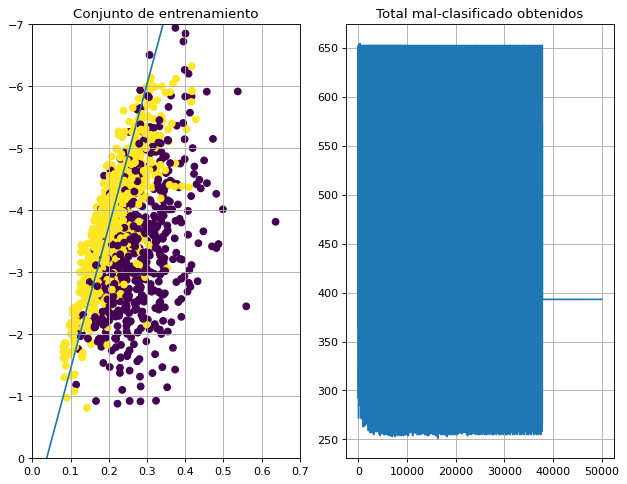

In [172]:
print("##### Gŕafica para conjunto de entrenamiento #####")
ax = drawWithError(x_train,y_train,[0,1],bpla2_w,50000)
print("Valor de E_in(h)",predError(x_train,y_train,bpla2_w[-1])/len(x_train))
print("###############################################")
ax[0].set_ylim((0,-7))
ax[0].set_xlim((0,0.7))
plt.show()


##### Gŕafica para conjunto de test #####
Valor de E_out(h) 0.366120218579235
###############################################


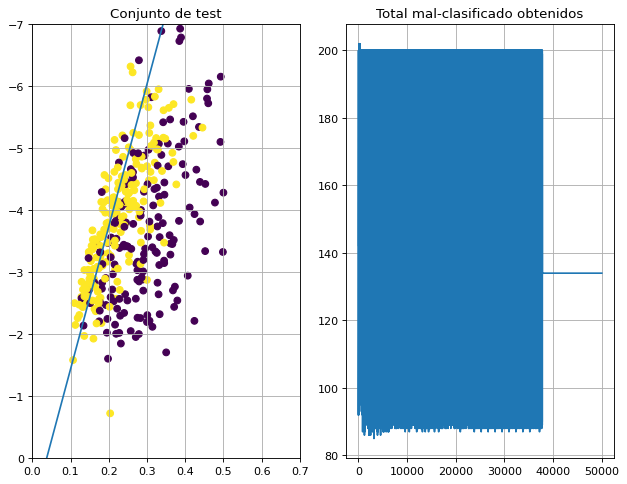

In [173]:
print("##### Gŕafica para conjunto de test #####")
print("Valor de E_out(h)",predError(x_test,y_test,bpla2_w[-1])/len(x_test))
ax = drawWithError(x_test,y_test,[0,1],bpla2_w,50000)
print("###############################################")
ax[0].set_title("Conjunto de test")
ax[0].set_ylim((0,-7))
ax[0].set_xlim((0,0.7))
plt.show()

Para el caso de PLA, al utilizar regresión lineal para inicializar los pesos, no he notado ninguna diferencia evidente. Ya que como vemos la variación sigue siendo la misma, y además, con el mismo número de iteraciones aparente haber convergido en una solución no óptima como en el caso anterior. 

Quizás, así como en mencionado en RL, quedaría mejor en la variación Pocket: 

### Regresión Lineal a Pocket-PLA

In [156]:
w_ini = lin_w.copy()
bppla2_w, bppla2_it = ajusta_PLA(x_train,y_train,w_ini,max_iters=150005,no_max=False,Pocket=True)
print("###### Resultados obtenidos #####")
print("Pesos:", bppla2_w[-1])
print("Iteraciones:", bppla2_it)
print("#################################")

###### Resultados obtenidos #####
Pesos: [   8.50676351 -163.00130454   -8.99007863]
Iteraciones: 150005
#################################


##### Gŕafica para conjunto de entrenamiento #####
Valor de E_in(h) 0.2102177554438861
###############################################


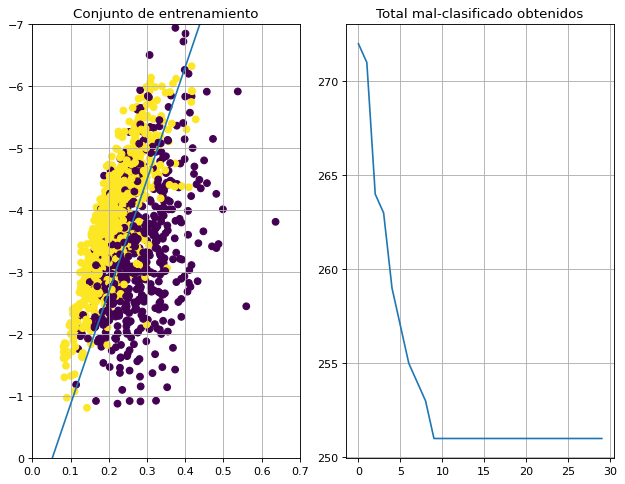

In [174]:
print("##### Gŕafica para conjunto de entrenamiento #####")
ax = drawWithError(x_train,y_train,[0,1],bppla2_w,30)
print("Valor de E_in(h)",predError(x_train,y_train,bppla2_w[-1])/len(x_train))
print("###############################################")
ax[0].set_ylim((0,-7))
ax[0].set_xlim((0,0.7))
plt.show()

Vemos que al utilizar la versión Pocket, inicializada por regresión lineal, apenas permitimos mejorar nuestra solución inicial, llegando rápidamente en lo que parece ser nuestro mínimo local. Me parece de las mejores implementaciones respecto a mi opinión personal. 

##### Gŕafica para conjunto de test #####
Valor de E_in(h) 0.25136612021857924
###############################################


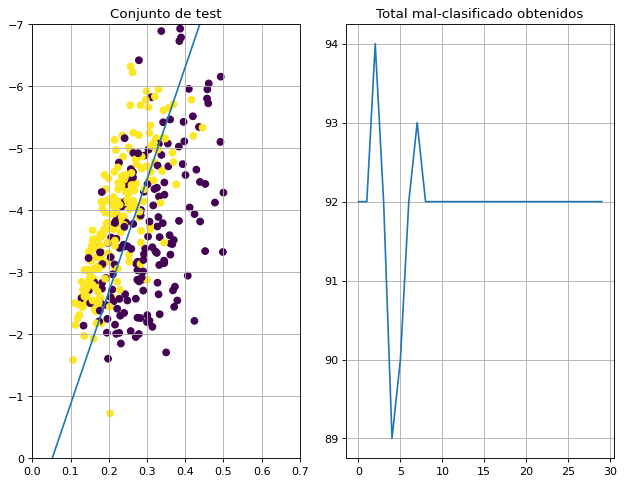

In [175]:
print("##### Gŕafica para conjunto de test #####")
ax = drawWithError(x_test,y_test,[0,1],bppla2_w,30)
print("Valor de E_in(h)",predError(x_test,y_test,bppla2_w[-1])/len(x_test))
print("###############################################")
ax[0].set_ylim((0,-7))
ax[0].set_xlim((0,0.7))
ax[0].set_title("Conjunto de test")
plt.show()

Lo más curioso es que aquí vuelve a ocurrir, uno de los valores obtenidos durante el proceso de entrenamiento aunque no fuera el mejor durante el entreno si que era el mejor con diferencia en el conjunto de test. Aún así hemos convergido a una solución equivalente al de regresión lineal sobre el conjunto de tests. 

Tras las distintas implementaciones, he encontrado que no hay diferencias importantes respecto al rendimiento de nuestra función h(x) respecto a f(x) cuando estamos tratando de datos fuera del conjunto de entrenamiento. Díria que son casi equivalentes, lo único que distingue es la velocidad de convergencia en RL gracias a la solución óptima inicial al inicializar con regresión lineal y la belleza de la gráfica de error que generan. 

### B.2.d) Obtener cotas sobre el verdadero valor de $E_{out}$ para los cuatros métodos empleados. Calcúlense dos cotas: una basada en $E_{in}$ y otra basada en $E_{test}$. Usar una tolerancia $\delta=0.05$. ¿Qué cota es mejor? Justifique la respuesta. 

$ N_e = 1194, \, \delta = 0.05 ,\,d_{vc} = 3 $ (Visto en teoría, al separar el conjunto de tres puntos, no podemos generar las $m_h(N)$ dicotomías, $2^N$)

#### Regresión Lineal: 
- $ \begin{cases} E_{in}(h) = 0.642 \implies 
E_{out}(h) \le E_{in}(h) + \sqrt{\frac{8}{N} log(\frac{4\cdot((2N)^{d_{vc}} + 1) }{\delta} } 
\le 0.642 + 0.20995 \le 0.8519 
\\ E_{test}(h) = 0.709 \implies E_{out}(h) \le E_{test}(h) + \sqrt{\frac{1}{2N}log\frac{2}{\delta}} 
\implies E_{out} \le 0.709 + 0.039 \le 0.7483 \end{cases}$

#### Regresión Logistica: 
- $ \begin{cases} E_{in}(h) = 0.524 \implies 
E_{out}(h) \le E_{in}(h) + \sqrt{\frac{8}{N} log(\frac{4\cdot((2N)^{d_{vc}} + 1) }{\delta} } 
\le 0.524 + 0.20995 \le 0.73395 
\\ E_{test}(h) = 0.557 \implies E_{out}(h) \le E_{test}(h) + \sqrt{\frac{1}{2N}log\frac{2}{\delta}} 
\implies E_{out} \le 0.557 + 0.039 \le 0.596 \end{cases}$

#### PLA
- $ \begin{cases} E_{in}(h) = 0.48 \implies 
E_{out}(h) \le E_{in}(h) + \sqrt{\frac{8}{N} log(\frac{4\cdot((2N)^{d_{vc}} + 1) }{\delta} } 
\le 0.484 + 0.20995 \le 0.69395 
\\ E_{test}(h) = 0.50 \implies E_{out}(h) \le E_{test}(h) + \sqrt{\frac{1}{2N}log\frac{2}{\delta}} 
\implies E_{out} \le 0.50 + 0.039 \le 0.539 \end{cases}$

#### Pocket-PLA
- $ \begin{cases} E_{in}(h) = 0.21 \implies 
E_{out}(h) \le E_{in}(h) + \sqrt{\frac{8}{N} log(\frac{4\cdot((2N)^{d_{vc}} + 1) }{\delta} } 
\le 0.21 + 0.20995 \le 0.41995 
\\ E_{test}(h) = 0.25 \implies E_{out}(h) \le E_{test}(h) + \sqrt{\frac{1}{2N}log\frac{2}{\delta}} 
\implies E_{out} \le 0.25 + 0.039 \le 0.289 \end{cases}$

Curiosamente, la cota más optimista es la del Pocket-PLA; Por que es la que nos indica el $E_{out}(h)$ más pequeño y cercano. Además, la cota aún más optimista es cuando utilizamos el conjunto de test, ya que nos indica un comportamiento mejor aproximado a uno fuera de la muestra; También es debido a que entonces podemos aplicar la inecuación de Hoeffding directamente y es una simplificación del error "$\epsilon$" que conlleva a una cota menos laxa y más estricta/real.

Diría que la diferencia decreciente entre valores de cota es debido a que utilizan diferentes funciones de pérdidas. Ya que hemos visto que tienen el mismo porcentaje de mal-clasificados. 